In [1]:
from study_ddpg import ddpg
import gym
import random
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
from agents.DDPG_Agent import DDPG_Agent
import argparse
from copy import deepcopy

import gym
import gym.spaces
import numpy as np
import pandas as pd
import torch.multiprocessing as mp

from agents.TD3_Agent import DTD3
from utils.random_process import *
from utils.util import *
from utils.memory import Memory, SharedMemory
from study_td3 import *
#USE_CUDA = torch.cuda.is_available()
USE_CUDA = False

if USE_CUDA:
    FloatTensor = torch.cuda.FloatTensor
else:
    FloatTensor = torch.FloatTensor

In [2]:
env = gym.make('Pendulum-v0')
env.seed(2)
state_dim = env.observation_space.shape[0]
action_dim = env.action_space.shape[0]
max_action = int(env.action_space.high[0])

In [3]:
def ddpg(n_episodes=1500, max_t=200, print_every=5, state_size=3, action_size = 1):
    scores_deque = deque(maxlen=print_every)
    agent = DDPG_Agent(state_size=state_size, action_size=action_size, random_seed=2)
    scores = []
    for i_episode in range(1, n_episodes + 1):
        state = env.reset()
        agent.reset()
        score = 0
        for _ in range(max_t):
            action = agent.act(state)
            next_state, reward, done, _ = env.step(action)
            agent.step(state, action, reward, next_state, done)
            state = next_state
            score += reward
            if done:
                break
        scores_deque.append(score)
        scores.append(score)
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)), end="")
        if i_episode % print_every == 0:
            print('\rEpisode {}\tAverage Score: {:.2f} \n '.format(i_episode, np.mean(scores_deque)))
    return agent

In [4]:
%%time
agent_ddpg = ddpg(n_episodes=5,state_size=state_dim,action_size=action_dim)

/home/mohamed/PycharmProjects/SIGAUD_INSPIRED/policies/ddpg_actor.py:57: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  state = torch.tensor(state)


Episode 1	Average Score: -1325.87

KeyboardInterrupt: 

In [6]:

# The environment
env = gym.make("Pendulum-v0")
state_dim = env.observation_space.shape[0]
action_dim = env.action_space.shape[0]
max_action = int(env.action_space.high[0])
# replay buffer
memory = Memory(100000, state_dim, action_dim)

# agent
agent = DTD3(state_dim, action_dim, max_action, memory,n_actor=5)
print("starting")
train(agent,n_episodes=10,max_steps=500000,debug=True,n_eval=5,n_actor=5,training_per_agent=100)

starting
noisy RL agent fitness:-1210.3648111322013
noisy RL agent fitness:-1503.665135413129
noisy RL agent fitness:-1141.8785045496659


  0%|          | 0/100 [00:00<?, ?it/s]

noisy RL agent fitness:-1397.9051956495039
noisy RL agent fitness:-1300.1644936176904


100%|██████████| 100/100 [00:02<00:00, 41.57it/s]


RL agent fitness:-1496.9888511962101
RL agent fitness:-1576.5803659215055
RL agent fitness:-1663.6897904368532
RL agent fitness:-1671.47668011879
RL agent fitness:-1580.7049859561034
Iteration#1: Total steps:5000 

noisy RL agent fitness:-1321.090719448424
noisy RL agent fitness:-1256.6106410853092
noisy RL agent fitness:-1039.8185193918346
noisy RL agent fitness:-1169.83709153878


  4%|▍         | 4/100 [00:00<00:02, 39.19it/s]

noisy RL agent fitness:-1415.8271188938402


100%|██████████| 100/100 [00:02<00:00, 38.98it/s]


RL agent fitness:-1547.8002746601876
RL agent fitness:-1458.4314027385044
RL agent fitness:-1514.083135267137
RL agent fitness:-1527.2373373199543
RL agent fitness:-1522.9694014812474
Iteration#2: Total steps:10000 

noisy RL agent fitness:-1546.180599476144
noisy RL agent fitness:-1338.0006809327547
noisy RL agent fitness:-1563.2518931544614
noisy RL agent fitness:-1556.9552388427323


  4%|▍         | 4/100 [00:00<00:02, 33.07it/s]

noisy RL agent fitness:-1532.276526796851


100%|██████████| 100/100 [00:03<00:00, 29.43it/s]


RL agent fitness:-1491.408209700278
RL agent fitness:-1408.3115507713733
RL agent fitness:-1502.6891776894463
RL agent fitness:-1403.4077709567803
RL agent fitness:-1476.2633089980204
Iteration#3: Total steps:15000 

noisy RL agent fitness:-1497.7850668588244
noisy RL agent fitness:-1498.5483739207564
noisy RL agent fitness:-1480.867080245194
noisy RL agent fitness:-1424.4831761412704


  5%|▌         | 5/100 [00:00<00:02, 39.94it/s]

noisy RL agent fitness:-1460.5833215253929


100%|██████████| 100/100 [00:02<00:00, 37.99it/s]


RL agent fitness:-1480.867491493303
RL agent fitness:-1479.1440898804246
RL agent fitness:-1506.900349969088
RL agent fitness:-1180.5837471193656
RL agent fitness:-1466.3196269066234
Iteration#4: Total steps:20000 

noisy RL agent fitness:-1403.823710945973
noisy RL agent fitness:-1487.71501213177
noisy RL agent fitness:-1395.2232120689225
noisy RL agent fitness:-1420.3058125525822


  3%|▎         | 3/100 [00:00<00:03, 25.66it/s]

noisy RL agent fitness:-1525.7407456560302


100%|██████████| 100/100 [00:02<00:00, 35.96it/s]


RL agent fitness:-1380.2612005723336
RL agent fitness:-1199.585269300632
RL agent fitness:-1228.6900026583896
RL agent fitness:-302.14953408174927
RL agent fitness:-1235.5975473320432
Iteration#5: Total steps:25000 

noisy RL agent fitness:-1382.42439467528
noisy RL agent fitness:-1198.8441141200285
noisy RL agent fitness:-1243.8725044409557
noisy RL agent fitness:-1175.8579242587125


  4%|▍         | 4/100 [00:00<00:02, 38.06it/s]

noisy RL agent fitness:-1175.0372442859205


100%|██████████| 100/100 [00:02<00:00, 36.06it/s]


RL agent fitness:-1435.3498770162896
RL agent fitness:-896.4693224722383
RL agent fitness:-1258.6490171191467
RL agent fitness:-791.0967924863264
RL agent fitness:-808.2797642641199
Iteration#6: Total steps:30000 

noisy RL agent fitness:-1498.6426019216156
noisy RL agent fitness:-1197.1653350420743
noisy RL agent fitness:-1151.1365730524406
noisy RL agent fitness:-418.04324657635505


  4%|▍         | 4/100 [00:00<00:02, 38.02it/s]

noisy RL agent fitness:-971.8540948312387


100%|██████████| 100/100 [00:03<00:00, 32.80it/s]


RL agent fitness:-1506.4359596120316
RL agent fitness:-1370.4913847337718
RL agent fitness:-1156.939481432755
RL agent fitness:-1048.2131889788193
RL agent fitness:-1193.0972966607067
Iteration#7: Total steps:35000 

noisy RL agent fitness:-1465.3465133015463
noisy RL agent fitness:-1358.0293742147373
noisy RL agent fitness:-1174.6970858498105
noisy RL agent fitness:-1048.276965908766


  4%|▍         | 4/100 [00:00<00:02, 33.63it/s]

noisy RL agent fitness:-1224.2215044066218


100%|██████████| 100/100 [00:03<00:00, 32.91it/s]


RL agent fitness:-1112.6542411497442
RL agent fitness:-1099.2308527482273
RL agent fitness:-1039.4219076432096
RL agent fitness:-314.39447209454164
RL agent fitness:-710.9439956998652
Iteration#8: Total steps:40000 

noisy RL agent fitness:-1129.160969663382
noisy RL agent fitness:-940.0633973388764
noisy RL agent fitness:-1057.810755771086
noisy RL agent fitness:-519.6972402608442


  4%|▍         | 4/100 [00:00<00:02, 34.15it/s]

noisy RL agent fitness:-898.6390157237522


100%|██████████| 100/100 [00:02<00:00, 34.57it/s]


RL agent fitness:-918.8709803502263
RL agent fitness:-987.9183700772535
RL agent fitness:-1151.504690183839
RL agent fitness:-813.3738988069678
RL agent fitness:-996.0667433410157
Iteration#9: Total steps:45000 

noisy RL agent fitness:-805.4751061767706
noisy RL agent fitness:-753.7723502285507
noisy RL agent fitness:-882.2781308028101
noisy RL agent fitness:-757.3000923485713


  4%|▍         | 4/100 [00:00<00:02, 33.11it/s]

noisy RL agent fitness:-1109.6704093376745


100%|██████████| 100/100 [00:03<00:00, 30.96it/s]


RL agent fitness:-635.9784222445059
RL agent fitness:-397.1158299702839
RL agent fitness:-839.2112295852039
RL agent fitness:-289.7113874807346
RL agent fitness:-686.5209615903957
Iteration#10: Total steps:50000 

noisy RL agent fitness:-731.4730054795091
noisy RL agent fitness:-373.1672011803551
noisy RL agent fitness:-827.095245506414
noisy RL agent fitness:-372.01398133934106


  4%|▍         | 4/100 [00:00<00:02, 34.05it/s]

noisy RL agent fitness:-883.2842851385005


100%|██████████| 100/100 [00:03<00:00, 25.53it/s]


RL agent fitness:-750.7731938790112
RL agent fitness:-595.5916284256318
RL agent fitness:-104.78634147386495
RL agent fitness:-778.9902465428597
RL agent fitness:-296.65112283816313
Iteration#11: Total steps:55000 

noisy RL agent fitness:-818.8751029818465
noisy RL agent fitness:-606.7476447155044
noisy RL agent fitness:-204.36276323637634
noisy RL agent fitness:-537.1946461008347


  4%|▍         | 4/100 [00:00<00:02, 34.24it/s]

noisy RL agent fitness:-583.7463615031478


100%|██████████| 100/100 [00:03<00:00, 30.85it/s]


RL agent fitness:-158.10887337061087
RL agent fitness:-193.95478715026513
RL agent fitness:-468.034388083724
RL agent fitness:-188.15040757235298
RL agent fitness:-428.5404323401899
Iteration#12: Total steps:60000 

noisy RL agent fitness:-541.8684299882505
noisy RL agent fitness:-535.5987618769165
noisy RL agent fitness:-629.0285252412732
noisy RL agent fitness:-497.1561532056063


  3%|▎         | 3/100 [00:00<00:03, 28.95it/s]

noisy RL agent fitness:-310.9195683290578


100%|██████████| 100/100 [00:04<00:00, 23.10it/s]


RL agent fitness:-136.11484089716828
RL agent fitness:-221.8977427053594
RL agent fitness:-341.9519433273447
RL agent fitness:-340.5687562934627
RL agent fitness:-230.88192643827747
Iteration#13: Total steps:65000 

noisy RL agent fitness:-362.8006168632944
noisy RL agent fitness:-283.5442036140383
noisy RL agent fitness:-310.8285242366166
noisy RL agent fitness:-285.88323812852286


  3%|▎         | 3/100 [00:00<00:03, 29.94it/s]

noisy RL agent fitness:-208.24534589699687


100%|██████████| 100/100 [00:04<00:00, 23.45it/s]


RL agent fitness:-728.2727759333112
RL agent fitness:-105.46227860470367
RL agent fitness:-156.14945804668287
RL agent fitness:-203.79689668107926
RL agent fitness:-165.60386895049083
Iteration#14: Total steps:70000 

noisy RL agent fitness:-716.531732314773
noisy RL agent fitness:-284.97975392866783
noisy RL agent fitness:-283.1440309229519
noisy RL agent fitness:-158.52912114101912


  4%|▍         | 4/100 [00:00<00:03, 31.81it/s]

noisy RL agent fitness:-270.8224328411096


100%|██████████| 100/100 [00:04<00:00, 21.60it/s]


RL agent fitness:-245.15707687452118
RL agent fitness:-181.8630413783429
RL agent fitness:-146.49952209564316
RL agent fitness:-152.91926281974958
RL agent fitness:-179.94870292906313
Iteration#15: Total steps:75000 

noisy RL agent fitness:-261.6795831740741
noisy RL agent fitness:-147.53345258655094
noisy RL agent fitness:-159.15188133530313
noisy RL agent fitness:-269.9311049733345


  3%|▎         | 3/100 [00:00<00:03, 26.75it/s]

noisy RL agent fitness:-206.81728093581614


100%|██████████| 100/100 [00:03<00:00, 27.00it/s]


RL agent fitness:-221.65012125678558
RL agent fitness:-128.5025292747118
RL agent fitness:-123.93879325734902
RL agent fitness:-219.58684759093293
RL agent fitness:-200.0847882396717
Iteration#16: Total steps:80000 

noisy RL agent fitness:-191.95227835398182
noisy RL agent fitness:-169.57281959251182
noisy RL agent fitness:-169.95797704491224
noisy RL agent fitness:-330.91824338748796


  3%|▎         | 3/100 [00:00<00:03, 28.85it/s]

noisy RL agent fitness:-160.2675626538318


100%|██████████| 100/100 [00:04<00:00, 21.67it/s]


RL agent fitness:-148.10663702672133
RL agent fitness:-204.58828490892557
RL agent fitness:-147.33334463889082
RL agent fitness:-152.10877207119265
RL agent fitness:-174.84619528304594
Iteration#17: Total steps:85000 

noisy RL agent fitness:-225.59807596441925
noisy RL agent fitness:-233.36720060727953
noisy RL agent fitness:-99.85217029713691
noisy RL agent fitness:-150.57391397340572


  3%|▎         | 3/100 [00:00<00:03, 26.21it/s]

noisy RL agent fitness:-178.71088166750394


100%|██████████| 100/100 [00:03<00:00, 25.70it/s]


RL agent fitness:-78.9001150325618
RL agent fitness:-188.15058979666628
RL agent fitness:-125.7673072468752
RL agent fitness:-155.76186093229836
RL agent fitness:-124.34908904330345
Iteration#18: Total steps:90000 

noisy RL agent fitness:-124.77643288197348
noisy RL agent fitness:-125.39462322937777
noisy RL agent fitness:-143.842652397758
noisy RL agent fitness:-173.83202139061467


  3%|▎         | 3/100 [00:00<00:03, 26.88it/s]

noisy RL agent fitness:-126.61643047716275


100%|██████████| 100/100 [00:04<00:00, 24.43it/s]


RL agent fitness:-144.91298152500522
RL agent fitness:-171.17008697227473
RL agent fitness:-170.51685862458285
RL agent fitness:-150.16659898972964
RL agent fitness:-121.74258229954353
Iteration#19: Total steps:95000 

noisy RL agent fitness:-172.8371959122961
noisy RL agent fitness:-174.93790757261354
noisy RL agent fitness:-193.03489947905013
noisy RL agent fitness:-228.80425875544225


  3%|▎         | 3/100 [00:00<00:03, 24.42it/s]

noisy RL agent fitness:-122.37511051435042


100%|██████████| 100/100 [00:03<00:00, 26.22it/s]


RL agent fitness:-221.3546780932058
RL agent fitness:-192.4146372178594
RL agent fitness:-158.50431575635952
RL agent fitness:-194.68862464693626
RL agent fitness:-124.29689532457455
Iteration#20: Total steps:100000 

noisy RL agent fitness:-170.188746049738
noisy RL agent fitness:-192.06816012114786
noisy RL agent fitness:-193.08535122013905
noisy RL agent fitness:-196.65201371370588


  3%|▎         | 3/100 [00:00<00:03, 25.94it/s]

noisy RL agent fitness:-144.75773437214016


100%|██████████| 100/100 [00:04<00:00, 24.31it/s]


RL agent fitness:-147.63492823204268
RL agent fitness:-153.76529669173783
RL agent fitness:-171.38303815295302
RL agent fitness:-186.7366497106107
RL agent fitness:-195.62481272169038
Iteration#21: Total steps:105000 

noisy RL agent fitness:-148.74963974798584
noisy RL agent fitness:-152.1226366013547
noisy RL agent fitness:-147.0362233350766
noisy RL agent fitness:-176.60963747791325


  3%|▎         | 3/100 [00:00<00:04, 24.09it/s]

noisy RL agent fitness:-121.51368873953636


100%|██████████| 100/100 [00:04<00:00, 23.49it/s]


RL agent fitness:-148.95012753859748
RL agent fitness:-124.39798640789293
RL agent fitness:-140.3989088062985
RL agent fitness:-172.49966420409447
RL agent fitness:-169.36653146049525
Iteration#22: Total steps:110000 

noisy RL agent fitness:-124.47082733801528
noisy RL agent fitness:-169.8786086336042
noisy RL agent fitness:-156.34779319931988
noisy RL agent fitness:-99.07485133766959


  3%|▎         | 3/100 [00:00<00:04, 23.14it/s]

noisy RL agent fitness:-123.14362292252645


100%|██████████| 100/100 [00:04<00:00, 21.78it/s]


RL agent fitness:-165.1072727537388
RL agent fitness:-148.23342233244654
RL agent fitness:-125.3572744690717
RL agent fitness:-123.318247325115
RL agent fitness:-150.14655636361573
Iteration#23: Total steps:115000 

noisy RL agent fitness:-176.32450739252553
noisy RL agent fitness:-150.0597712606864
noisy RL agent fitness:-175.22043594365778
noisy RL agent fitness:-121.31611949576195


  3%|▎         | 3/100 [00:00<00:04, 20.53it/s]

noisy RL agent fitness:-182.47743914850855


100%|██████████| 100/100 [00:04<00:00, 21.23it/s]


RL agent fitness:-212.4481198651641
RL agent fitness:-173.5020563834451
RL agent fitness:-148.93857874317285
RL agent fitness:-145.08976118074978
RL agent fitness:-124.52325385931817
Iteration#24: Total steps:120000 

noisy RL agent fitness:-178.32475223484323
noisy RL agent fitness:-168.0980149777791
noisy RL agent fitness:-122.53901841628279
noisy RL agent fitness:-145.28960865428218


  3%|▎         | 3/100 [00:00<00:04, 21.06it/s]

noisy RL agent fitness:-150.56358993015445


100%|██████████| 100/100 [00:05<00:00, 17.93it/s]


RL agent fitness:-148.85055578050202
RL agent fitness:-169.8188188080428
RL agent fitness:-123.38382039367355
RL agent fitness:-167.60026596889915
RL agent fitness:-194.00598077044876
Iteration#25: Total steps:125000 

noisy RL agent fitness:-122.71112886129814
noisy RL agent fitness:-121.79499383842699
noisy RL agent fitness:-169.28705965808138
noisy RL agent fitness:-215.44096322585023


  3%|▎         | 3/100 [00:00<00:04, 22.24it/s]

noisy RL agent fitness:-74.44207849808006


100%|██████████| 100/100 [00:04<00:00, 23.09it/s]


RL agent fitness:-118.867667243608
RL agent fitness:-192.3569786378946
RL agent fitness:-127.41194638009968
RL agent fitness:-172.1748591145186
RL agent fitness:-184.59889056979463
Iteration#26: Total steps:130000 

noisy RL agent fitness:-175.78560179783864
noisy RL agent fitness:-75.49732450129174
noisy RL agent fitness:-143.5880423124491
noisy RL agent fitness:-211.74197577437735


  3%|▎         | 3/100 [00:00<00:04, 22.31it/s]

noisy RL agent fitness:-123.00080724382755


100%|██████████| 100/100 [00:04<00:00, 22.51it/s]


RL agent fitness:-149.13041518985992
RL agent fitness:-143.34988636471613
RL agent fitness:-182.73076684220246
RL agent fitness:-180.7372114861371
RL agent fitness:-100.10573880109307
Iteration#27: Total steps:135000 

noisy RL agent fitness:-146.85256287770983
noisy RL agent fitness:-121.645594149879
noisy RL agent fitness:-170.36458902678234
noisy RL agent fitness:-145.71299816630707


  3%|▎         | 3/100 [00:00<00:04, 21.58it/s]

noisy RL agent fitness:-124.89842611960134


100%|██████████| 100/100 [00:04<00:00, 22.08it/s]


RL agent fitness:-192.91440723158405
RL agent fitness:-171.49217939961494
RL agent fitness:-193.0801981375067
RL agent fitness:-146.69676651800918
RL agent fitness:-197.47855373627593
Iteration#28: Total steps:140000 

noisy RL agent fitness:-120.81782073496814
noisy RL agent fitness:-156.17493575883162
noisy RL agent fitness:-94.82343344372657
noisy RL agent fitness:-163.3458866888875


  3%|▎         | 3/100 [00:00<00:04, 21.06it/s]

noisy RL agent fitness:-235.13926719827117


100%|██████████| 100/100 [00:04<00:00, 21.39it/s]


RL agent fitness:-171.45981533269477
RL agent fitness:-191.40971937141725
RL agent fitness:-97.92109373953573
RL agent fitness:-196.30219895745347
RL agent fitness:-170.91476739213974
Iteration#29: Total steps:145000 

noisy RL agent fitness:-97.78182545888487
noisy RL agent fitness:-148.9736693560291
noisy RL agent fitness:-123.57561321143476
noisy RL agent fitness:-147.72438878622577


  3%|▎         | 3/100 [00:00<00:04, 21.00it/s]

noisy RL agent fitness:-142.11851268941956


100%|██████████| 100/100 [00:04<00:00, 20.82it/s]


RL agent fitness:-73.3243654991152
RL agent fitness:-146.6533070592715
RL agent fitness:-149.89035906636246
RL agent fitness:-122.37002639091335
RL agent fitness:-168.09604634899324
Iteration#30: Total steps:150000 

noisy RL agent fitness:-278.8889156672388
noisy RL agent fitness:-198.22921551240643
noisy RL agent fitness:-152.98475231654976
noisy RL agent fitness:-148.09858867130737


  2%|▏         | 2/100 [00:00<00:05, 19.54it/s]

noisy RL agent fitness:-174.6209542769795


100%|██████████| 100/100 [00:05<00:00, 17.92it/s]


RL agent fitness:-71.65507638555803
RL agent fitness:-183.74777239268695
RL agent fitness:-74.43128330963492
RL agent fitness:-147.2450159969199
RL agent fitness:-149.66416615133554
Iteration#31: Total steps:155000 

noisy RL agent fitness:-108.81203304574952
noisy RL agent fitness:-144.37904354887843
noisy RL agent fitness:-188.05948435917642
noisy RL agent fitness:-143.43765002264152


  3%|▎         | 3/100 [00:00<00:04, 20.30it/s]

noisy RL agent fitness:-180.1435134909372


100%|██████████| 100/100 [00:04<00:00, 20.00it/s]


RL agent fitness:-174.8873866373345
RL agent fitness:-98.47279875119604
RL agent fitness:-146.72408810640889
RL agent fitness:-192.06601348993877
RL agent fitness:-244.05078077942548
Iteration#32: Total steps:160000 

noisy RL agent fitness:-193.91487265927717
noisy RL agent fitness:-221.79168781881566
noisy RL agent fitness:-168.75187294606638
noisy RL agent fitness:-244.73827747856376


  3%|▎         | 3/100 [00:00<00:04, 21.05it/s]

noisy RL agent fitness:-173.1478833227271


100%|██████████| 100/100 [00:05<00:00, 19.30it/s]


RL agent fitness:-121.27390703531185
RL agent fitness:-121.47842432168042
RL agent fitness:-174.28301504038657
RL agent fitness:-150.24059345876276
RL agent fitness:-122.09960975437598
Iteration#33: Total steps:165000 

noisy RL agent fitness:-177.83626308880292
noisy RL agent fitness:-166.91401992378468
noisy RL agent fitness:-176.9503648419586
noisy RL agent fitness:-170.4654307579263


  2%|▏         | 2/100 [00:00<00:05, 19.28it/s]

noisy RL agent fitness:-172.35455896479974


100%|██████████| 100/100 [00:05<00:00, 18.74it/s]


RL agent fitness:-70.11782083397956
RL agent fitness:-99.61962099212396
RL agent fitness:-96.8133005865184
RL agent fitness:-217.28055084861052
RL agent fitness:-121.41460240190023
Iteration#34: Total steps:170000 

noisy RL agent fitness:-144.1269962192194
noisy RL agent fitness:-160.05821186427272
noisy RL agent fitness:-194.4158047342557
noisy RL agent fitness:-120.21611626649198


  2%|▏         | 2/100 [00:00<00:06, 15.86it/s]

noisy RL agent fitness:-172.07239569906875


100%|██████████| 100/100 [00:05<00:00, 18.09it/s]


RL agent fitness:-190.1939031379243
RL agent fitness:-121.2040614035833
RL agent fitness:-121.88084635512908
RL agent fitness:-122.02044484921757
RL agent fitness:-255.07277734132808
Iteration#35: Total steps:175000 

noisy RL agent fitness:-121.76533373014463
noisy RL agent fitness:-215.291800280024
noisy RL agent fitness:-140.97558450677624
noisy RL agent fitness:-194.24754955513774


  2%|▏         | 2/100 [00:00<00:05, 17.30it/s]

noisy RL agent fitness:-197.72822854029786


100%|██████████| 100/100 [00:05<00:00, 18.56it/s]


RL agent fitness:-187.45848892079167
RL agent fitness:-115.07788906237249
RL agent fitness:-173.1347733874565
RL agent fitness:-183.5451740595236
RL agent fitness:-98.42106111067604
Iteration#36: Total steps:180000 

noisy RL agent fitness:-144.73784869944853
noisy RL agent fitness:-229.37011001093487
noisy RL agent fitness:-149.9413847621713
noisy RL agent fitness:-143.6348074746444


  2%|▏         | 2/100 [00:00<00:05, 19.23it/s]

noisy RL agent fitness:-122.17875756342058


100%|██████████| 100/100 [00:05<00:00, 17.59it/s]


RL agent fitness:-122.20538453717704
RL agent fitness:-73.71008918481323
RL agent fitness:-93.01375271619678
RL agent fitness:-187.31539698240996
RL agent fitness:-142.941261163902
Iteration#37: Total steps:185000 

noisy RL agent fitness:-228.186738486666
noisy RL agent fitness:-170.56373376836694
noisy RL agent fitness:-173.4081733301483
noisy RL agent fitness:-221.17218705044175


  2%|▏         | 2/100 [00:00<00:05, 18.59it/s]

noisy RL agent fitness:-195.175566278468


100%|██████████| 100/100 [00:05<00:00, 17.71it/s]


RL agent fitness:-122.9683017594042
RL agent fitness:-203.91138511760875
RL agent fitness:-177.9189599300558
RL agent fitness:-73.3770934662354
RL agent fitness:-170.13301308049745
Iteration#38: Total steps:190000 

noisy RL agent fitness:-122.20129279304714
noisy RL agent fitness:-160.0706243144777
noisy RL agent fitness:-177.5856753995409
noisy RL agent fitness:-218.9368095874464


  2%|▏         | 2/100 [00:00<00:05, 18.19it/s]

noisy RL agent fitness:-188.58019736915247


100%|██████████| 100/100 [00:06<00:00, 15.37it/s]


RL agent fitness:-140.79019882361197
RL agent fitness:-168.05261891894853
RL agent fitness:-147.27977273343646
RL agent fitness:-121.28478834170623
RL agent fitness:-216.0348735268702
Iteration#39: Total steps:195000 

noisy RL agent fitness:-217.73022143709082
noisy RL agent fitness:-143.93584440391527
noisy RL agent fitness:-166.20589964820297
noisy RL agent fitness:-123.18449259828756


  2%|▏         | 2/100 [00:00<00:05, 18.34it/s]

noisy RL agent fitness:-97.74148699120424


100%|██████████| 100/100 [00:05<00:00, 16.74it/s]


RL agent fitness:-193.35454731690442
RL agent fitness:-121.13682790228268
RL agent fitness:-147.80065866380383
RL agent fitness:-170.83403676817073
RL agent fitness:-167.23847938054533
Iteration#40: Total steps:200000 

noisy RL agent fitness:-170.6210005115028
noisy RL agent fitness:-190.75713489802402
noisy RL agent fitness:-167.6942415837529
noisy RL agent fitness:-169.61798776171995


  2%|▏         | 2/100 [00:00<00:05, 17.04it/s]

noisy RL agent fitness:-143.10519814359102


100%|██████████| 100/100 [00:05<00:00, 16.79it/s]


RL agent fitness:-213.96869275556415
RL agent fitness:-194.54100532384027
RL agent fitness:-122.92768967070674
RL agent fitness:-242.5027192829989
RL agent fitness:-245.5957689179723
Iteration#41: Total steps:205000 

noisy RL agent fitness:-97.91227092170277
noisy RL agent fitness:-115.41747250884691
noisy RL agent fitness:-122.26607859400102
noisy RL agent fitness:-143.93779508193234


  2%|▏         | 2/100 [00:00<00:06, 15.75it/s]

noisy RL agent fitness:-121.88282032895363


100%|██████████| 100/100 [00:06<00:00, 16.63it/s]


RL agent fitness:-171.0462820279222
RL agent fitness:-244.50022998496934
RL agent fitness:-117.00566615106007
RL agent fitness:-143.55550747526223
RL agent fitness:-95.63281837784334
Iteration#42: Total steps:210000 

noisy RL agent fitness:-161.04449534503578
noisy RL agent fitness:-98.33099340727844
noisy RL agent fitness:-118.24705657668707
noisy RL agent fitness:-92.51632581491982


  2%|▏         | 2/100 [00:00<00:05, 16.99it/s]

noisy RL agent fitness:-121.46593516600839


100%|██████████| 100/100 [00:06<00:00, 16.36it/s]


RL agent fitness:-142.71352668412274
RL agent fitness:-120.89593789551354
RL agent fitness:-145.05967248903985
RL agent fitness:-124.25228849324758
RL agent fitness:-96.29289057646447
Iteration#43: Total steps:215000 

noisy RL agent fitness:-95.95385719973014
noisy RL agent fitness:-73.60517889311026
noisy RL agent fitness:-124.47148109341947
noisy RL agent fitness:-174.22347796187125


  2%|▏         | 2/100 [00:00<00:05, 17.37it/s]

noisy RL agent fitness:-97.37884391885204


100%|██████████| 100/100 [00:06<00:00, 16.18it/s]


RL agent fitness:-117.41119076470197
RL agent fitness:-146.466081038246
RL agent fitness:-176.82822984124047
RL agent fitness:-138.65140589212794
RL agent fitness:-70.20735271416082
Iteration#44: Total steps:220000 

noisy RL agent fitness:-192.14636497429916
noisy RL agent fitness:-174.07252619225113
noisy RL agent fitness:-119.84164923194093
noisy RL agent fitness:-192.74057566681455


  2%|▏         | 2/100 [00:00<00:05, 16.36it/s]

noisy RL agent fitness:-152.67333700442143


100%|██████████| 100/100 [00:06<00:00, 15.57it/s]


RL agent fitness:-167.78978544885678
RL agent fitness:-120.63056645092247
RL agent fitness:-119.16737805123111
RL agent fitness:-70.3424576443605
RL agent fitness:-120.46480010520467
Iteration#45: Total steps:225000 

noisy RL agent fitness:-123.2043784609878
noisy RL agent fitness:-149.80228471791628
noisy RL agent fitness:-118.51318741019728
noisy RL agent fitness:-198.6998958446326


  2%|▏         | 2/100 [00:00<00:06, 14.95it/s]

noisy RL agent fitness:-193.4679046783696


100%|██████████| 100/100 [00:06<00:00, 15.37it/s]


RL agent fitness:-148.79666924651505
RL agent fitness:-156.65308868445214
RL agent fitness:-141.97859371209017
RL agent fitness:-180.2444698773175
RL agent fitness:-236.81137469300774
Iteration#46: Total steps:230000 

noisy RL agent fitness:-145.32623406118935
noisy RL agent fitness:-98.33750057856005
noisy RL agent fitness:-176.9405222351954
noisy RL agent fitness:-97.7642289881314


  2%|▏         | 2/100 [00:00<00:06, 16.10it/s]

noisy RL agent fitness:-191.39133514672196


100%|██████████| 100/100 [00:06<00:00, 15.18it/s]


RL agent fitness:-119.59888363841792
RL agent fitness:-75.63463498070894
RL agent fitness:-93.31845505926029
RL agent fitness:-227.26923030697193
RL agent fitness:-147.25406646643563
Iteration#47: Total steps:235000 

noisy RL agent fitness:-170.70288518580932
noisy RL agent fitness:-168.71248997525927
noisy RL agent fitness:-138.9621402046667
noisy RL agent fitness:-158.82445876131237


  2%|▏         | 2/100 [00:00<00:06, 15.19it/s]

noisy RL agent fitness:-123.05925087004633


100%|██████████| 100/100 [00:07<00:00, 13.36it/s]


RL agent fitness:-140.5909687109525
RL agent fitness:-155.32202722320065
RL agent fitness:-120.53549646609736
RL agent fitness:-185.08575260829335
RL agent fitness:-193.38633241345292
Iteration#48: Total steps:240000 

noisy RL agent fitness:-149.97964172984592
noisy RL agent fitness:-213.45645698325052
noisy RL agent fitness:-195.55299810063758
noisy RL agent fitness:-99.96696185885153


  2%|▏         | 2/100 [00:00<00:06, 15.33it/s]

noisy RL agent fitness:-144.21632491160966


100%|██████████| 100/100 [00:06<00:00, 14.50it/s]


RL agent fitness:-161.6736879919339
RL agent fitness:-145.36372086065006
RL agent fitness:-194.2267610212401
RL agent fitness:-123.22126862021148
RL agent fitness:-120.13221586260204
Iteration#49: Total steps:245000 

noisy RL agent fitness:-167.96777848722368
noisy RL agent fitness:-181.22177456214303
noisy RL agent fitness:-139.93788322839265
noisy RL agent fitness:-121.71428839526439


  2%|▏         | 2/100 [00:00<00:06, 15.30it/s]

noisy RL agent fitness:-168.40511373797077


100%|██████████| 100/100 [00:06<00:00, 14.50it/s]


RL agent fitness:-70.88347223503872
RL agent fitness:-168.5505885093927
RL agent fitness:-74.38711950962393
RL agent fitness:-124.09600249970961
RL agent fitness:-187.77651017743523
Iteration#50: Total steps:250000 

noisy RL agent fitness:-119.52456761238632
noisy RL agent fitness:-154.33525792847277
noisy RL agent fitness:-150.22420153445356
noisy RL agent fitness:-170.34197970634676


  2%|▏         | 2/100 [00:00<00:07, 13.56it/s]

noisy RL agent fitness:-119.13364859436987


100%|██████████| 100/100 [00:07<00:00, 13.79it/s]


RL agent fitness:-172.8238661321194
RL agent fitness:-142.763782849312
RL agent fitness:-139.57647303610278
RL agent fitness:-95.56158699764089
RL agent fitness:-192.73535768581723
Iteration#51: Total steps:255000 

noisy RL agent fitness:-193.96065258608223
noisy RL agent fitness:-143.85995287739917
noisy RL agent fitness:-97.06446333605558
noisy RL agent fitness:-235.47946219114223


  2%|▏         | 2/100 [00:00<00:06, 14.17it/s]

noisy RL agent fitness:-101.79275110047836


100%|██████████| 100/100 [00:07<00:00, 13.78it/s]


RL agent fitness:-119.06474760718254
RL agent fitness:-149.76682711252732
RL agent fitness:-168.33531039738966
RL agent fitness:-119.02529873938802
RL agent fitness:-169.4195726281331
Iteration#52: Total steps:260000 

noisy RL agent fitness:-216.40358851662668
noisy RL agent fitness:-195.97308102905998
noisy RL agent fitness:-121.4660638617481
noisy RL agent fitness:-173.35093907567946


  2%|▏         | 2/100 [00:00<00:06, 14.04it/s]

noisy RL agent fitness:-189.55485393539783


100%|██████████| 100/100 [00:08<00:00, 12.25it/s]


RL agent fitness:-169.54676400404216
RL agent fitness:-144.46971973154388
RL agent fitness:-185.03173423954968
RL agent fitness:-122.9463241192913
RL agent fitness:-71.50177291320283
Iteration#53: Total steps:265000 

noisy RL agent fitness:-170.17559421866784
noisy RL agent fitness:-172.22449337928762
noisy RL agent fitness:-145.4621406045972
noisy RL agent fitness:-98.72315874649374


  2%|▏         | 2/100 [00:00<00:07, 12.93it/s]

noisy RL agent fitness:-161.47382122204013


100%|██████████| 100/100 [00:08<00:00, 11.62it/s]


RL agent fitness:-149.24367956426474
RL agent fitness:-94.84477873410955
RL agent fitness:-189.78099626408112
RL agent fitness:-124.54592139669599
RL agent fitness:-192.74466227071446
Iteration#54: Total steps:270000 

noisy RL agent fitness:-218.84492797395174
noisy RL agent fitness:-143.62230853025747
noisy RL agent fitness:-148.51152003330552
noisy RL agent fitness:-141.11084460071652


  2%|▏         | 2/100 [00:00<00:07, 13.22it/s]

noisy RL agent fitness:-123.02609368264646


100%|██████████| 100/100 [00:07<00:00, 13.10it/s]


RL agent fitness:-148.19377664778636
RL agent fitness:-174.02282286196075
RL agent fitness:-148.09421642336014
RL agent fitness:-197.77235942195773
RL agent fitness:-209.3136059149243
Iteration#55: Total steps:275000 

noisy RL agent fitness:-211.8311311877398
noisy RL agent fitness:-118.41731829058213
noisy RL agent fitness:-204.91335084815805
noisy RL agent fitness:-220.38223875542803


  2%|▏         | 2/100 [00:00<00:07, 13.06it/s]

noisy RL agent fitness:-144.4421448385315


100%|██████████| 100/100 [00:07<00:00, 13.15it/s]


RL agent fitness:-163.29935636856186
RL agent fitness:-124.77712691924182
RL agent fitness:-142.49260834967438
RL agent fitness:-167.89871090725202
RL agent fitness:-96.43901948606023
Iteration#56: Total steps:280000 

noisy RL agent fitness:-135.7526835859469
noisy RL agent fitness:-162.85749198639058
noisy RL agent fitness:-143.99158393790293
noisy RL agent fitness:-237.2537776800901


  2%|▏         | 2/100 [00:00<00:08, 12.16it/s]

noisy RL agent fitness:-100.07550459485603


100%|██████████| 100/100 [00:07<00:00, 12.91it/s]


RL agent fitness:-96.40001795903554
RL agent fitness:-235.1062586217638
RL agent fitness:-211.38836902076983
RL agent fitness:-120.10189617855326
RL agent fitness:-146.3444404863072
Iteration#57: Total steps:285000 

noisy RL agent fitness:-144.50153357858147
noisy RL agent fitness:-122.28995196031244
noisy RL agent fitness:-145.81247025966894
noisy RL agent fitness:-171.09532361581145


  2%|▏         | 2/100 [00:00<00:07, 13.34it/s]

noisy RL agent fitness:-221.2224164663654


100%|██████████| 100/100 [00:07<00:00, 12.75it/s]


RL agent fitness:-118.68456569854398
RL agent fitness:-166.25672005387955
RL agent fitness:-145.4062710799325
RL agent fitness:-137.56797983466294
RL agent fitness:-165.8669926716986
Iteration#58: Total steps:290000 

noisy RL agent fitness:-121.34516698716024
noisy RL agent fitness:-118.45380909797
noisy RL agent fitness:-122.17219614136143
noisy RL agent fitness:-239.42914203785466


  2%|▏         | 2/100 [00:00<00:07, 12.76it/s]

noisy RL agent fitness:-124.13897849736709


100%|██████████| 100/100 [00:07<00:00, 12.64it/s]


RL agent fitness:-179.63439117253878
RL agent fitness:-191.73984552699662
RL agent fitness:-169.95502068056635
RL agent fitness:-164.03992356582896
RL agent fitness:-169.91296886258812
Iteration#59: Total steps:295000 

noisy RL agent fitness:-167.96474847706105
noisy RL agent fitness:-202.56919568762802
noisy RL agent fitness:-143.62165895589916
noisy RL agent fitness:-221.45435043227036


  2%|▏         | 2/100 [00:00<00:07, 12.77it/s]

noisy RL agent fitness:-222.6961603108342


100%|██████████| 100/100 [00:07<00:00, 12.60it/s]


RL agent fitness:-211.9415044647867
RL agent fitness:-95.623299834841
RL agent fitness:-119.85210849085959
RL agent fitness:-95.74449314893504
RL agent fitness:-143.67858508025233
Iteration#60: Total steps:300000 

noisy RL agent fitness:-191.49854351951439
noisy RL agent fitness:-142.8278819256483
noisy RL agent fitness:-162.32230567288028
noisy RL agent fitness:-192.77642096529092


  2%|▏         | 2/100 [00:00<00:07, 12.45it/s]

noisy RL agent fitness:-148.2879273827157


100%|██████████| 100/100 [00:08<00:00, 11.71it/s]


RL agent fitness:-164.84881361586247
RL agent fitness:-148.14365863605593
RL agent fitness:-188.82389576164752
RL agent fitness:-122.218534707663
RL agent fitness:-143.58200434137078
Iteration#61: Total steps:305000 

noisy RL agent fitness:-94.86205846704425
noisy RL agent fitness:-145.3915043286431
noisy RL agent fitness:-218.72958497987088
noisy RL agent fitness:-187.10078407408074


  2%|▏         | 2/100 [00:00<00:08, 11.92it/s]

noisy RL agent fitness:-123.58395716662912


100%|██████████| 100/100 [00:08<00:00, 12.13it/s]


RL agent fitness:-214.44674708152925
RL agent fitness:-118.80885584110335
RL agent fitness:-121.10044742115005
RL agent fitness:-167.83539889726873
RL agent fitness:-50.2323327780456
Iteration#62: Total steps:310000 

noisy RL agent fitness:-121.2319873137147
noisy RL agent fitness:-119.11137595497925
noisy RL agent fitness:-148.97301737398615
noisy RL agent fitness:-124.37949239280086


  2%|▏         | 2/100 [00:00<00:08, 11.72it/s]

noisy RL agent fitness:-267.15992856868445


100%|██████████| 100/100 [00:08<00:00, 11.94it/s]


RL agent fitness:-167.57546440587842
RL agent fitness:-120.21787238793027
RL agent fitness:-130.57606128785324
RL agent fitness:-47.26912239760328
RL agent fitness:-95.25643308887689
Iteration#63: Total steps:315000 

noisy RL agent fitness:-173.5448033176868
noisy RL agent fitness:-274.4786974985717
noisy RL agent fitness:-120.73544031777206
noisy RL agent fitness:-125.26097994193825


  2%|▏         | 2/100 [00:00<00:08, 12.04it/s]

noisy RL agent fitness:-198.49602231858555


100%|██████████| 100/100 [00:08<00:00, 11.90it/s]


RL agent fitness:-142.318852711893
RL agent fitness:-166.00944431402817
RL agent fitness:-94.26163576722587
RL agent fitness:-146.44792300501663
RL agent fitness:-94.81555845967895
Iteration#64: Total steps:320000 

noisy RL agent fitness:-140.8296479514068
noisy RL agent fitness:-197.01342762779245
noisy RL agent fitness:-237.723492906286
noisy RL agent fitness:-121.56992364050564


  2%|▏         | 2/100 [00:00<00:07, 12.29it/s]

noisy RL agent fitness:-167.42549051890478


100%|██████████| 100/100 [00:09<00:00, 11.04it/s]


RL agent fitness:-147.80242859852305
RL agent fitness:-168.9926726113091
RL agent fitness:-143.22226788003513
RL agent fitness:-140.73328436547692
RL agent fitness:-169.23960928018633
Iteration#65: Total steps:325000 

noisy RL agent fitness:-167.26626139834218
noisy RL agent fitness:-207.55853913289542
noisy RL agent fitness:-145.86933751486282
noisy RL agent fitness:-141.07138194025885


  2%|▏         | 2/100 [00:00<00:08, 11.81it/s]

noisy RL agent fitness:-275.6507812903595


100%|██████████| 100/100 [00:08<00:00, 11.95it/s]


RL agent fitness:-237.20241937982664
RL agent fitness:-120.34431067644555
RL agent fitness:-231.25265088675445
RL agent fitness:-121.0804563488922
RL agent fitness:-98.19566241908845
Iteration#66: Total steps:330000 

noisy RL agent fitness:-168.61962410873483
noisy RL agent fitness:-239.2254450684756
noisy RL agent fitness:-180.37539010927793
noisy RL agent fitness:-122.4595132243646


  2%|▏         | 2/100 [00:00<00:08, 11.70it/s]

noisy RL agent fitness:-165.00079635803334


100%|██████████| 100/100 [00:08<00:00, 11.40it/s]


RL agent fitness:-162.62989035508502
RL agent fitness:-119.1644064211034
RL agent fitness:-172.44806673108658
RL agent fitness:-235.84118121988985
RL agent fitness:-167.1324065201619
Iteration#67: Total steps:335000 

noisy RL agent fitness:-99.24173481455753
noisy RL agent fitness:-73.63162753584902
noisy RL agent fitness:-147.14628064251448
noisy RL agent fitness:-245.07703021733082


  2%|▏         | 2/100 [00:00<00:08, 11.54it/s]

noisy RL agent fitness:-189.9387411506115


100%|██████████| 100/100 [00:09<00:00, 11.06it/s]


RL agent fitness:-119.39656275017092
RL agent fitness:-141.8340862678083
RL agent fitness:-159.73481190209404
RL agent fitness:-96.61885421525282
RL agent fitness:-145.18354533900933
Iteration#68: Total steps:340000 

noisy RL agent fitness:-164.8718344372425
noisy RL agent fitness:-192.523619633904
noisy RL agent fitness:-73.58607712739277
noisy RL agent fitness:-145.36360773236981


  2%|▏         | 2/100 [00:00<00:08, 11.50it/s]

noisy RL agent fitness:-125.23409468932846


100%|██████████| 100/100 [00:08<00:00, 11.15it/s]


RL agent fitness:-139.41395223615967
RL agent fitness:-145.88203502337257
RL agent fitness:-142.81155792055168
RL agent fitness:-169.181805757884
RL agent fitness:-191.25299557840015
Iteration#69: Total steps:345000 

noisy RL agent fitness:-167.6215612659675
noisy RL agent fitness:-147.61056630375984
noisy RL agent fitness:-158.24016896713752
noisy RL agent fitness:-120.50839826859949


  2%|▏         | 2/100 [00:00<00:08, 11.36it/s]

noisy RL agent fitness:-144.058394860725


100%|██████████| 100/100 [00:08<00:00, 11.14it/s]


RL agent fitness:-140.71558076931007
RL agent fitness:-95.70749993342012
RL agent fitness:-133.8148554433351
RL agent fitness:-98.70844980567834
RL agent fitness:-146.92245221647528
Iteration#70: Total steps:350000 

noisy RL agent fitness:-146.28393015302652
noisy RL agent fitness:-146.74402720187555
noisy RL agent fitness:-143.15330896223202
noisy RL agent fitness:-144.57751336528133


  2%|▏         | 2/100 [00:00<00:09, 10.82it/s]

noisy RL agent fitness:-168.34840752689203


100%|██████████| 100/100 [00:09<00:00, 11.06it/s]


RL agent fitness:-168.01406014066788
RL agent fitness:-163.8969046955128
RL agent fitness:-144.60544723203353
RL agent fitness:-98.08343590126154
RL agent fitness:-189.35886147427442
Iteration#71: Total steps:355000 

noisy RL agent fitness:-117.4976214661687
noisy RL agent fitness:-146.37452840877464
noisy RL agent fitness:-165.5091737778399
noisy RL agent fitness:-192.71650845961162


  2%|▏         | 2/100 [00:00<00:09, 10.50it/s]

noisy RL agent fitness:-146.8880388310756


100%|██████████| 100/100 [00:09<00:00, 10.88it/s]


RL agent fitness:-140.93516464341093
RL agent fitness:-99.85757887058462
RL agent fitness:-98.56611478527083
RL agent fitness:-168.15363501504368
RL agent fitness:-168.14375579705379
Iteration#72: Total steps:360000 

noisy RL agent fitness:-73.5689252175354
noisy RL agent fitness:-74.70786155623473
noisy RL agent fitness:-155.2717896049192
noisy RL agent fitness:-216.24047414668718


  2%|▏         | 2/100 [00:00<00:08, 11.03it/s]

noisy RL agent fitness:-99.501356702818


100%|██████████| 100/100 [00:09<00:00, 11.02it/s]


RL agent fitness:-189.938646888366
RL agent fitness:-145.1302121547691
RL agent fitness:-95.74298576130315
RL agent fitness:-188.27567014106617
RL agent fitness:-95.72403181934149
Iteration#73: Total steps:365000 

noisy RL agent fitness:-180.5304488836382
noisy RL agent fitness:-167.1372980327794
noisy RL agent fitness:-191.1254008702407
noisy RL agent fitness:-120.29839413326079


  2%|▏         | 2/100 [00:00<00:08, 11.09it/s]

noisy RL agent fitness:-73.13076705883017


100%|██████████| 100/100 [00:09<00:00, 10.63it/s]


RL agent fitness:-183.39808371555188
RL agent fitness:-141.09918928723516
RL agent fitness:-147.3408017605947
RL agent fitness:-146.07942418627218
RL agent fitness:-164.62521236478162
Iteration#74: Total steps:370000 

noisy RL agent fitness:-73.71015247353044
noisy RL agent fitness:-121.84759403598859
noisy RL agent fitness:-123.22550452465785
noisy RL agent fitness:-117.69474059485432


  2%|▏         | 2/100 [00:00<00:09, 10.73it/s]

noisy RL agent fitness:-162.05164460004187


100%|██████████| 100/100 [00:09<00:00, 10.53it/s]


RL agent fitness:-160.919746409099
RL agent fitness:-188.10014833854714
RL agent fitness:-196.14048672916607
RL agent fitness:-95.58522757084805
RL agent fitness:-121.61627542811262
Iteration#75: Total steps:375000 

noisy RL agent fitness:-219.3437086711976
noisy RL agent fitness:-141.791391281575
noisy RL agent fitness:-202.8502068796351
noisy RL agent fitness:-186.5951442647863


  2%|▏         | 2/100 [00:00<00:09, 10.63it/s]

noisy RL agent fitness:-112.96980228305321


100%|██████████| 100/100 [00:09<00:00, 10.40it/s]


RL agent fitness:-191.92887657567033
RL agent fitness:-195.43028969656567
RL agent fitness:-175.4988509262334
RL agent fitness:-120.86726846823288
RL agent fitness:-125.90536645618174
Iteration#76: Total steps:380000 

noisy RL agent fitness:-167.3596561834375
noisy RL agent fitness:-148.35696278803553
noisy RL agent fitness:-189.51156274652152
noisy RL agent fitness:-181.22698226821765


  2%|▏         | 2/100 [00:00<00:09, 10.83it/s]

noisy RL agent fitness:-154.9177932929768


100%|██████████| 100/100 [00:09<00:00, 10.24it/s]


RL agent fitness:-140.65623576529686
RL agent fitness:-119.02453432770074
RL agent fitness:-143.07304115025175
RL agent fitness:-119.53184024688491
RL agent fitness:-121.96992479169221
Iteration#77: Total steps:385000 

noisy RL agent fitness:-189.64962550325885
noisy RL agent fitness:-189.76518579892584
noisy RL agent fitness:-146.1731705228627
noisy RL agent fitness:-121.59184809074081


  2%|▏         | 2/100 [00:00<00:09, 10.22it/s]

noisy RL agent fitness:-187.89686098812044


100%|██████████| 100/100 [00:09<00:00, 10.28it/s]


RL agent fitness:-180.1869454994429
RL agent fitness:-118.55769585566964
RL agent fitness:-120.08587853625738
RL agent fitness:-169.1148251578007
RL agent fitness:-124.1576095726111
Iteration#78: Total steps:390000 

noisy RL agent fitness:-99.15563536190125
noisy RL agent fitness:-116.80216356221374
noisy RL agent fitness:-168.65738577541447
noisy RL agent fitness:-98.11003306637292


  1%|          | 1/100 [00:00<00:09,  9.91it/s]

noisy RL agent fitness:-131.2259389064808


100%|██████████| 100/100 [00:09<00:00, 10.71it/s]


RL agent fitness:-123.78424790716265
RL agent fitness:-118.49078400628999
RL agent fitness:-72.37470459519965
RL agent fitness:-170.71763921026223
RL agent fitness:-197.14587067913735
Iteration#79: Total steps:395000 

noisy RL agent fitness:-142.74393198415436
noisy RL agent fitness:-123.1877641428697
noisy RL agent fitness:-144.31445224256933
noisy RL agent fitness:-97.23859018941916


  2%|▏         | 2/100 [00:00<00:09, 10.53it/s]

noisy RL agent fitness:-49.488426765733394


100%|██████████| 100/100 [00:10<00:00,  9.92it/s]


RL agent fitness:-97.01502159561157
RL agent fitness:-121.00683420351206
RL agent fitness:-141.1630563220947
RL agent fitness:-147.9227519779834
RL agent fitness:-86.69999715111136
Iteration#80: Total steps:400000 

noisy RL agent fitness:-120.54818415784538
noisy RL agent fitness:-99.02845147137553
noisy RL agent fitness:-144.0725307574208
noisy RL agent fitness:-243.74773203640476


  1%|          | 1/100 [00:00<00:10,  9.87it/s]

noisy RL agent fitness:-119.50657673093815


100%|██████████| 100/100 [00:10<00:00,  9.32it/s]


RL agent fitness:-200.88429152760233
RL agent fitness:-141.20824358069206
RL agent fitness:-210.0560027501561
RL agent fitness:-144.81814866616742
RL agent fitness:-145.28266354989117
Iteration#81: Total steps:405000 

noisy RL agent fitness:-95.87571467299746
noisy RL agent fitness:-171.27732652594474
noisy RL agent fitness:-120.90527819291276
noisy RL agent fitness:-189.90018233199493


  1%|          | 1/100 [00:00<00:09,  9.90it/s]

noisy RL agent fitness:-75.77979299413323


100%|██████████| 100/100 [00:10<00:00,  9.66it/s]


RL agent fitness:-184.9992020803825
RL agent fitness:-142.13609233665545
RL agent fitness:-119.8233913870919
RL agent fitness:-186.24466412679024
RL agent fitness:-99.65859361995003
Iteration#82: Total steps:410000 

noisy RL agent fitness:-122.63392379700781
noisy RL agent fitness:-190.00395852453045
noisy RL agent fitness:-190.52780997287067
noisy RL agent fitness:-218.80749652231148


  1%|          | 1/100 [00:00<00:10,  9.44it/s]

noisy RL agent fitness:-196.56133422563596


100%|██████████| 100/100 [00:10<00:00,  9.33it/s]


RL agent fitness:-116.58687223208248
RL agent fitness:-144.50061872843872
RL agent fitness:-125.53258675000514
RL agent fitness:-121.69421392699664
RL agent fitness:-174.38003857053235
Iteration#83: Total steps:415000 

noisy RL agent fitness:-191.71423841538902
noisy RL agent fitness:-98.88690046503775
noisy RL agent fitness:-126.91868037222488
noisy RL agent fitness:-143.85868256544592


  1%|          | 1/100 [00:00<00:11,  8.98it/s]

noisy RL agent fitness:-74.22155185115699


100%|██████████| 100/100 [00:10<00:00,  9.55it/s]


RL agent fitness:-92.83224062358624
RL agent fitness:-168.36450183904498
RL agent fitness:-168.03478148037806
RL agent fitness:-192.08907069934838
RL agent fitness:-121.58550943837938
Iteration#84: Total steps:420000 

noisy RL agent fitness:-121.17694474358466
noisy RL agent fitness:-165.40923328810737
noisy RL agent fitness:-120.78492303561802
noisy RL agent fitness:-119.88448865200007


  1%|          | 1/100 [00:00<00:10,  9.25it/s]

noisy RL agent fitness:-236.57377404087725


100%|██████████| 100/100 [00:10<00:00,  9.48it/s]


RL agent fitness:-94.80501003615967
RL agent fitness:-169.666438437131
RL agent fitness:-142.00146218848613
RL agent fitness:-228.88987442666635
RL agent fitness:-332.0934482117751
Iteration#85: Total steps:425000 

noisy RL agent fitness:-147.6110154414054
noisy RL agent fitness:-123.34349564510244
noisy RL agent fitness:-95.30023574215227
noisy RL agent fitness:-168.6965983153431


  1%|          | 1/100 [00:00<00:10,  9.13it/s]

noisy RL agent fitness:-120.64497922446722


100%|██████████| 100/100 [00:10<00:00,  9.24it/s]


RL agent fitness:-241.07030150171195
RL agent fitness:-140.54311844997966
RL agent fitness:-143.58245217238738
RL agent fitness:-163.80765859077673
RL agent fitness:-358.0567189540071
Iteration#86: Total steps:430000 

noisy RL agent fitness:-145.90756244667935
noisy RL agent fitness:-72.09448091238667
noisy RL agent fitness:-97.7057151743648
noisy RL agent fitness:-212.09095138083904


  1%|          | 1/100 [00:00<00:10,  9.07it/s]

noisy RL agent fitness:-569.9597917757135


100%|██████████| 100/100 [00:10<00:00,  9.34it/s]


RL agent fitness:-179.97537294897816
RL agent fitness:-111.5098367183139
RL agent fitness:-144.949417248666
RL agent fitness:-123.13109567226812
RL agent fitness:-610.7205391072022
Iteration#87: Total steps:435000 

noisy RL agent fitness:-122.03344148019566
noisy RL agent fitness:-168.1959554727288
noisy RL agent fitness:-142.5803365527444
noisy RL agent fitness:-146.4169609659635


  1%|          | 1/100 [00:00<00:10,  9.02it/s]

noisy RL agent fitness:-303.60877961055013


100%|██████████| 100/100 [00:11<00:00,  9.01it/s]


RL agent fitness:-168.4190021624624
RL agent fitness:-121.43808943348104
RL agent fitness:-97.66066498141973
RL agent fitness:-187.19646224611657
RL agent fitness:-165.33381837836168
Iteration#88: Total steps:440000 

noisy RL agent fitness:-195.82814321946168
noisy RL agent fitness:-165.76150895513362
noisy RL agent fitness:-188.10998609680405
noisy RL agent fitness:-182.74112885455207


  1%|          | 1/100 [00:00<00:11,  8.86it/s]

noisy RL agent fitness:-148.49952767911617


100%|██████████| 100/100 [00:10<00:00,  9.27it/s]


RL agent fitness:-166.42937322678773
RL agent fitness:-140.32941579508886
RL agent fitness:-118.82067817195033
RL agent fitness:-183.66400763266742
RL agent fitness:-140.42284006227356
Iteration#89: Total steps:445000 

noisy RL agent fitness:-122.54958247122946
noisy RL agent fitness:-146.9133203109981
noisy RL agent fitness:-146.08601742398125
noisy RL agent fitness:-194.98032451867815


  1%|          | 1/100 [00:00<00:11,  8.87it/s]

noisy RL agent fitness:-213.87047574340787


100%|██████████| 100/100 [00:10<00:00,  9.20it/s]


RL agent fitness:-48.93478680874052
RL agent fitness:-117.17695913839945
RL agent fitness:-117.94914156050466
RL agent fitness:-148.51376444168847
RL agent fitness:-146.3700948365302
Iteration#90: Total steps:450000 

noisy RL agent fitness:-72.92726213798349
noisy RL agent fitness:-149.06767738883187
noisy RL agent fitness:-143.11878230099336
noisy RL agent fitness:-123.1716277834577


  1%|          | 1/100 [00:00<00:10,  9.32it/s]

noisy RL agent fitness:-142.15565966025943


100%|██████████| 100/100 [00:11<00:00,  9.02it/s]


RL agent fitness:-49.12649156257118
RL agent fitness:-144.5656596370182
RL agent fitness:-100.85998269031244
RL agent fitness:-443.5567479139978
RL agent fitness:-194.23238490604524
Iteration#91: Total steps:455000 

noisy RL agent fitness:-200.60670540432125
noisy RL agent fitness:-97.57114966451391
noisy RL agent fitness:-155.8640424454879
noisy RL agent fitness:-297.8847563383128


  1%|          | 1/100 [00:00<00:11,  8.51it/s]

noisy RL agent fitness:-124.09922190143989


100%|██████████| 100/100 [00:11<00:00,  9.08it/s]


RL agent fitness:-122.50832615369146
RL agent fitness:-123.41200250983272
RL agent fitness:-169.998469626199
RL agent fitness:-150.2964952023064
RL agent fitness:-144.3664986632849
Iteration#92: Total steps:460000 

noisy RL agent fitness:-192.87699420039556
noisy RL agent fitness:-120.34581835585496
noisy RL agent fitness:-197.06956814562108
noisy RL agent fitness:-192.88538823438552


  1%|          | 1/100 [00:00<00:12,  8.16it/s]

noisy RL agent fitness:-73.17984700014313


100%|██████████| 100/100 [00:11<00:00,  8.68it/s]


RL agent fitness:-144.9828498690478
RL agent fitness:-168.27502923591118
RL agent fitness:-126.56794334962407
RL agent fitness:-190.91221751964585
RL agent fitness:-99.43743808707961
Iteration#93: Total steps:465000 

noisy RL agent fitness:-153.90794772644523
noisy RL agent fitness:-196.0037811520137
noisy RL agent fitness:-146.9995825416609
noisy RL agent fitness:-183.93329237254306


  1%|          | 1/100 [00:00<00:11,  8.77it/s]

noisy RL agent fitness:-123.41075324134381


100%|██████████| 100/100 [00:11<00:00,  8.56it/s]


RL agent fitness:-121.23562570691006
RL agent fitness:-170.38660089782334
RL agent fitness:-138.09492423881065
RL agent fitness:-96.09542713542756
RL agent fitness:-149.8475856360979
Iteration#94: Total steps:470000 

noisy RL agent fitness:-98.46841970840602
noisy RL agent fitness:-168.07593544785726
noisy RL agent fitness:-121.02389802126899
noisy RL agent fitness:-190.41969847063314


  1%|          | 1/100 [00:00<00:11,  8.67it/s]

noisy RL agent fitness:-195.24905636405998


100%|██████████| 100/100 [00:11<00:00,  8.51it/s]


RL agent fitness:-116.73414007832608
RL agent fitness:-154.0256868508067
RL agent fitness:-189.90376282314838
RL agent fitness:-172.20061160279943
RL agent fitness:-171.06154613017947
Iteration#95: Total steps:475000 

noisy RL agent fitness:-233.59408173188163
noisy RL agent fitness:-252.7759459788577
noisy RL agent fitness:-123.34623086320607
noisy RL agent fitness:-199.02924032016904


  1%|          | 1/100 [00:00<00:11,  8.43it/s]

noisy RL agent fitness:-96.37270702963413


100%|██████████| 100/100 [00:12<00:00,  8.18it/s]


RL agent fitness:-98.79145511736681
RL agent fitness:-179.30861287860444
RL agent fitness:-144.38202655814288
RL agent fitness:-73.34061537533657
RL agent fitness:-167.37894190558197
Iteration#96: Total steps:480000 

noisy RL agent fitness:-169.57187307656233
noisy RL agent fitness:-100.6925686054692
noisy RL agent fitness:-141.17696468986063
noisy RL agent fitness:-143.17856106394447


  1%|          | 1/100 [00:00<00:12,  7.98it/s]

noisy RL agent fitness:-75.49721598815265


100%|██████████| 100/100 [00:12<00:00,  8.20it/s]


RL agent fitness:-167.94223477306846
RL agent fitness:-169.74326152345327
RL agent fitness:-116.19616824541033
RL agent fitness:-144.41367443645646
RL agent fitness:-168.89959140102755
Iteration#97: Total steps:485000 

noisy RL agent fitness:-191.8756351235166
noisy RL agent fitness:-141.72491736309138
noisy RL agent fitness:-168.26817820206654
noisy RL agent fitness:-163.53068902798853


  1%|          | 1/100 [00:00<00:11,  8.50it/s]

noisy RL agent fitness:-217.87996163799818


100%|██████████| 100/100 [00:12<00:00,  8.21it/s]


RL agent fitness:-76.7963753995697
RL agent fitness:-121.75583757562072
RL agent fitness:-97.95030895135216
RL agent fitness:-167.97466861323437
RL agent fitness:-266.05421896133277
Iteration#98: Total steps:490000 

noisy RL agent fitness:-209.7991019933701
noisy RL agent fitness:-71.65598040535723
noisy RL agent fitness:-169.51399264169692
noisy RL agent fitness:-168.15406828779942


  1%|          | 1/100 [00:00<00:12,  8.05it/s]

noisy RL agent fitness:-99.15534079888876


100%|██████████| 100/100 [00:12<00:00,  8.01it/s]


RL agent fitness:-219.47112993819883
RL agent fitness:-74.04736872499257
RL agent fitness:-145.67954960360356
RL agent fitness:-121.24526056580446
RL agent fitness:-122.31700216483902
Iteration#99: Total steps:495000 

noisy RL agent fitness:-173.22360705099769
noisy RL agent fitness:-162.88990750904213
noisy RL agent fitness:-72.3500753688659
noisy RL agent fitness:-186.01547525638574


  1%|          | 1/100 [00:00<00:11,  8.80it/s]

noisy RL agent fitness:-191.10681636241264


100%|██████████| 100/100 [00:12<00:00,  7.93it/s]


RL agent fitness:-146.97883593704884
RL agent fitness:-167.56201822989894
RL agent fitness:-190.21775193105913
RL agent fitness:-100.26290105635033
RL agent fitness:-160.30684603053933
Iteration#100: Total steps:500000 



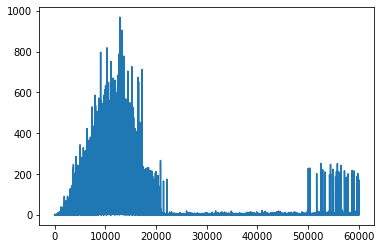

In [7]:
df = pd.DataFrame(agent.stats)
df = df.loc[df['actor'] == 3]
plt.plot(np.arange(df["critic_loss"].shape[0]),df["critic_loss"])

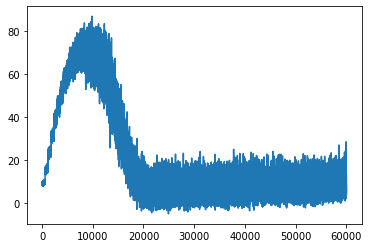

In [9]:
df = pd.DataFrame(agent.stats)
df = df.loc[df['actor'] == 2]
plt.plot(np.arange(df["actor_loss"].shape[0]),df["actor_loss"])

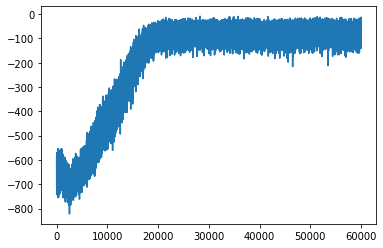

In [10]:
df = pd.DataFrame(agent.stats)
df = df.loc[df['actor'] == 3]
plt.plot(np.arange(df["reward_sum"].shape[0]),df["reward_sum"])